** 개인적으로 부족한 부분만 정리한 내용입니다.

# 머신 러닝 모델의 평가
---

- 보통 Train, Validation, Test 로 데이터를 분리해서 사용
- 검증용 데이터는 모델의 성능을 평가하는 것이 아닌, 모델의 성능을 조정하기 위한 용도
  - 과적합 여부, 하이퍼파라미터의 조정 등을 위해 사용
  - 검증, 튜닝을 마친 뒤에 Test데이터로 성능 평가를 실시
- 검증, 테스트 데이터를 나눌만큼 데이터의 양이 충분하지 않다면 K-폴드 교차 검증 방법을 사용

# 혼동 행렬(Confusion Matrix)
---

- 정확도(accuracy)는 맞춘 결과와 틀린 결과에 대한 자세한 정보를 제공하지는 않는다.
- 정밀도(Precision) : positive 예측 케이스중 실제 positive인 비율
- 재현율(Recall) : 실제 positive값 중 positive 예측의 비율
$$Accuracy = {{TP + TN} \over {TP+FP+TN+FN}}$$

$$Precision = {{TP} \over {TP+TN}}$$

$$Recall = {{TP} \over {TP+FN}}$$

# Keras linear regression
---

In [0]:
!pip install tensorflow-gpu==2.0.0-rc1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [0]:
X=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([11,22,33,44,53,66,77,87,95])

model = Sequential()
model.add(Dense(1,input_dim=1, activation='linear')) # linear dense를 추가
sgd = optimizers.SGD(lr=0.01) # optimizer로 경사하강법을 사용
model.compile(optimizers=sgd, loss='mse', metrics=['mse']) # 손실과 metric 모두 mse를 사용
model.fit(X,y,batch_size=1, epochs=2000, shuffle=False, verbose=1)

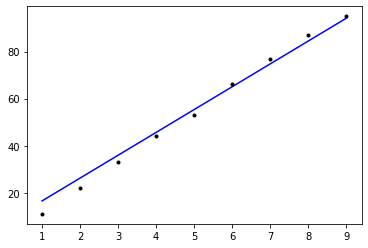

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,model.predict(X),'b',X,y,'k.')
plt.show()

In [0]:
### 다중 선형 회귀
X=np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])
y=np.array([73,82,72,57,34])

model = Sequential()
model.add(Dense(1,input_dim=3,activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd,loss='mse',metric=['mse'])
model.fit(X,y,batch_size=1,epochs=2000,shuffle=False)

In [34]:
print(model.predict(X))
print(y)
print(model.evaluate(X,y))

[[72.927185]
 [81.96541 ]
 [72.07211 ]
 [57.125404]
 [33.791122]]
[73 82 72 57 34]
5/1 [======================================================================================================================================================] - 0s 9ms/sample - loss: 0.0142
0.014210996218025684


# Keras logistic regression
---

In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1,input_dim=1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X,y,batch_size=1,epochs=100,shuffle=False)

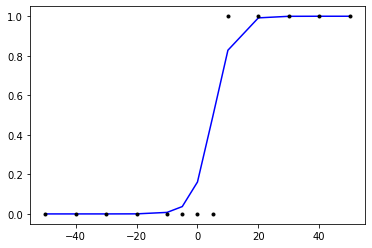

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, model.predict(X), 'b', X,y, 'k.')
plt.show()

In [0]:
## 다중 로지스틱 회귀
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y=np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)

In [37]:
print(model.predict(X))
print(y)
print(model.evaluate(X,y))

[[0.41842166]
 [0.8482052 ]
 [0.86553746]
 [0.98039013]]
[0 1 1 1]
4/1 [========================================================================================================================] - 0s 20ms/sample - loss: 0.2177 - binary_accuracy: 1.0000
[0.21771292388439178, 1.0]
